In [1]:
from functions import *
import numpy as np
import pandas as pd
from functions import *
from questions import *
from visualization import *
from models import *

In [2]:
%load_ext autoreload
%autoreload 2

Make pandas display everything

In [20]:
#show all rows
pd.set_option('display.max_rows', None)

#set the display option to show all columns
pd.set_option('display.max_columns', None)

#show the full width of each column
pd.set_option('display.max_colwidth', None)

# show the full width of the DataFrame
pd.set_option('display.width', None)

In [3]:
#From here and on, our script starts executing
dataframe1, dataframe2 = read_files()

In [4]:
#do a minor edit in df1 so as to have all split product codes saved as a set
dataframe1, dataframe2 = edit_dfs(dataframe1, dataframe2)

c:\Users\steve\Clio Muse Data Analysis Project\Clio_Muse-Data-Analysis-Project-1\functions.py:309: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dataframe1['booking_date'] = pd.to_datetime(dataframe1['booking_date'], dayfirst=True)


Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Unnamed: 0', 'Reviews', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories'],
      dtype='object')


In [5]:
#add profit to dataframe2
dataframe2 = add_df2_profit(dataframe1, dataframe2)

In [6]:
#which tours go together?
go_together = which_tours_go_together(dataframe1, dataframe2)

In [7]:
#how does a successful tour look like?
successful = successful_tour_looks_like(dataframe1, dataframe2)

In [8]:
#which tours do we recommend to a traveller?
which_tours_do_we_recommend_to_a_traveller(dataframe1, dataframe2, go_together)

In [9]:
save_to_excel(dataframe1, dataframe2)

In [10]:
from IPython.display import display
display(dataframe1.head(5))

,id,reference_code,travel_date,booking_date,booking_status,split_product_code,language,tours,product_title,product_type,...,Ticket Price,Profit,split_product_codes,booking_day,booking_hour,travel_day,travel_day_number,travel_month,number_of_stories,money_spent_per_traveller
0,98825,GYGX7Q4WHBX3,2023-01-05,2022-12-13 23:11:00,ACTIVE,STL284,English,284,Castel Sant’ Angelo: Skip-the-Line Ticket & Au...,Skip-the-Line,...,34.00,24.00,"{STL284, 288DE}",Tuesday,23,Thursday,travel_date,1,2,29.00
8,98826,GYG32NWHYK2Z,2023-01-03,2022-12-13 23:04:00,ACTIVE,STL526,English,526,Moorish Castle: Skip-The-Line e-ticket with Au...,Skip-the-Line,...,35.00,19.00,"{537DE, STL526, 539}",Tuesday,23,Tuesday,travel_date,1,3,18.00
18,98828,GYGMX57A5K6H,2023-01-03,2022-12-13 23:06:00,ACTIVE,STL539,Spanish,539,Quinta da Regaleira: Skip-The-Line e-ticket wi...,Skip-the-Line,...,26.00,16.00,"{STL539, 537EN}",Tuesday,23,Tuesday,travel_date,1,2,21.00
26,98855,GYG83Y54QLYF,2023-01-07,2022-12-14 11:02:00,ACTIVE,STL55,Italian,55,National Archaeological Museum: Skip-The-Line ...,Skip-the-Line,...,16.00,26.00,"{447DE, STL55}",Wednesday,11,Saturday,travel_date,1,2,14.00
39,98877,GYG2RA8L48HY,2023-01-18,2022-12-15 07:34:00,ACTIVE,AU226,English,226,Heraklion: the Castle of the Moat,Audio,...,9.99,9.99,{AU226DE},Thursday,7,Wednesday,travel_date,1,1,9.99


In [11]:
dataframe2.head(5)

,Practical Information,Product Code and Name,Unnamed: 2,Qualitative Information - Findings,Unnamed: 4,Unnamed: 5,Experience,month,Product Code,Name of Product,split_product_code,Country,language,split_product_codes,Standardized_Experience,number_of_stories,Profit
0,Important Information,Name of Product Reviewed,Review,Content,Technology,Customer Support,Overall Experience,January,Name of Product Reviewed,None,Name of Product Reviewed,NaN,NaN,{Name of Product Reviewed},NaN,1,NaN
1,False,STL55 | Athens National Archaeological Museum ...,Without the Audio Guide I would not have under...,NaN,NaN,NaN,Excellent (5 stars),January,STL55,Athens National Archaeological Museum Ticket ...,STL55,NaN,NaN,{STL55},5,1,26.0
2,False,TO240_181_51_459 | Acropolis & 6 Archaeologica...,"I liked it a lot, you know different things ab...",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,English,"{51, TO240, 181, 459}",4,4,12.0
8,False,TO240_181_51_459 | Acropolis & 6 Archaeologica...,"I liked it a lot, you know different things ab...",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Spanish,"{51, TO240, 181, 459}",4,4,12.0
60,False,TO240_181_51_459 | Acropolis & 6 Archaeologica...,"I liked it a lot, you know different things ab...",NaN,NaN,NaN,Positive (4 stars),January,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Italian,"{51, TO240, 181, 459}",4,4,12.0


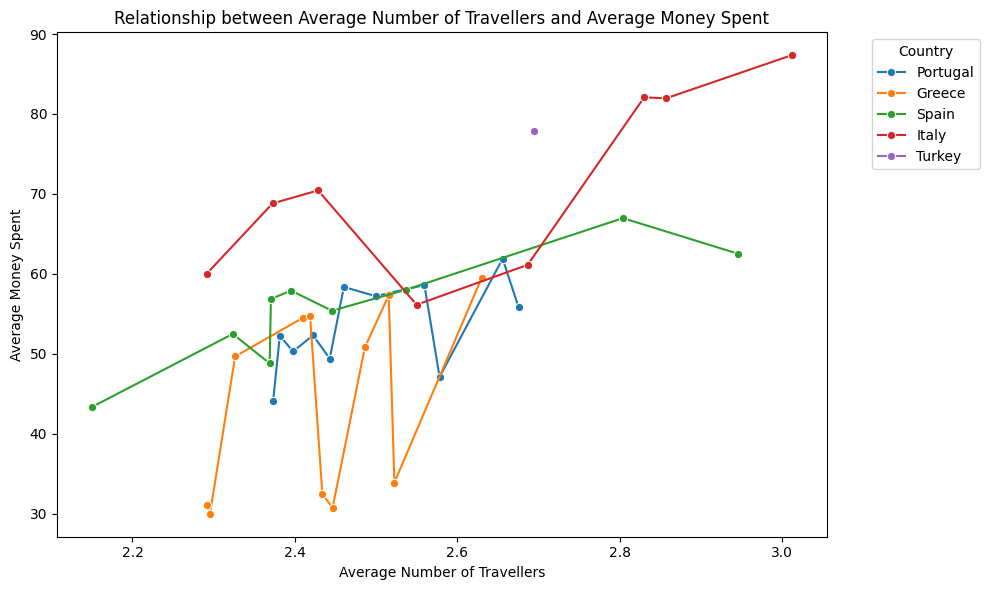

In [12]:
travellers_vs_spending(dataframe1)


Note: The average number of travellers per country changes depending on the month.

c:\Users\steve\Clio Muse Data Analysis Project\Clio_Muse-Data-Analysis-Project-1\visualization.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Stories', y='Average Profit', data=df1, palette='coolwarm', width=0.5)


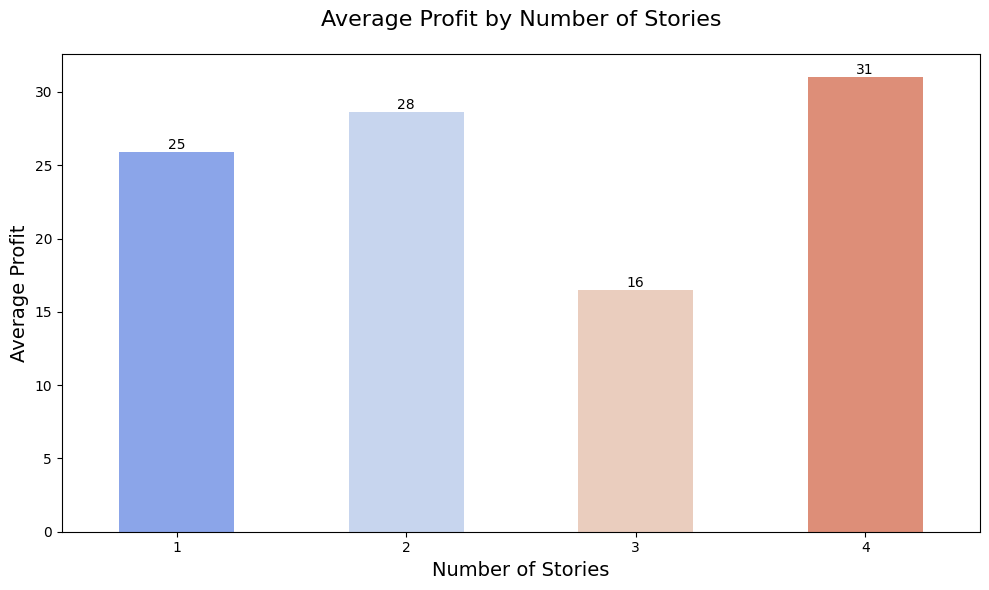

,Number of Stories,Average Profit
0,1,25.926304
1,2,28.611188
2,3,16.465882
3,4,31.048301


In [13]:
optimum_number_of_stories_profit(dataframe1)

c:\Users\steve\Clio Muse Data Analysis Project\Clio_Muse-Data-Analysis-Project-1\visualization.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Standardized_Experience', y='Most_Common_Number_of_Stories', data=df, palette='rocket')


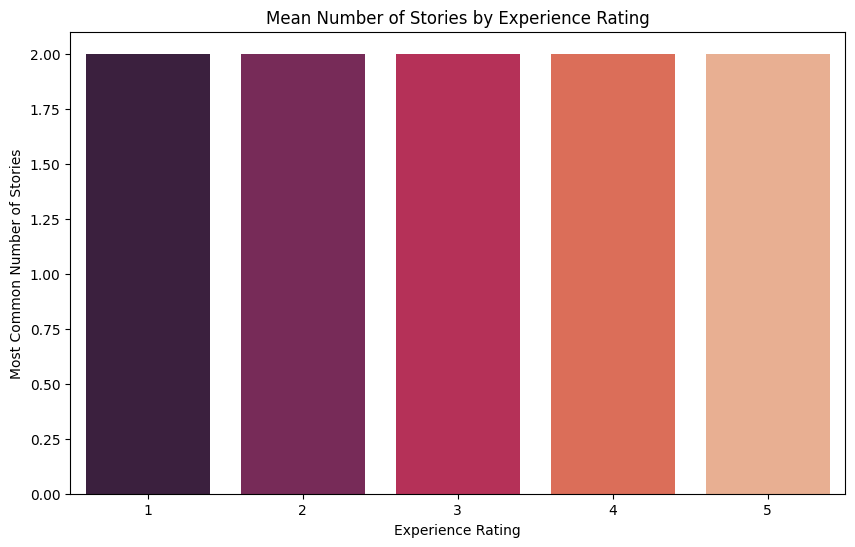

In [14]:
optimum_number_of_stories_liked(dataframe2)

We can see that the most common number of stories per booking is 2, regardless of user experience.
We can deduct that it is better to strive for 2 stories then.

In [15]:
dataframe1.columns

Index(['id', 'reference_code', 'travel_date', 'booking_date', 'booking_status',
       'split_product_code', 'language', 'tours', 'product_title',
       'product_type', 'product_country', 'seller_name', 'seller_id', 'month',
       'task_id', 'channel', 'num_of_travellers', 'retail_price', 'net_price',
       'product_code', 'stories', 'Country', 'Ticket Price', 'Profit',
       'split_product_codes', 'booking_day', 'booking_hour', 'travel_day',
       'travel_day_number', 'travel_month', 'number_of_stories',
       'money_spent_per_traveller'],
      dtype='object')

In [16]:
dataframe2.columns

Index(['Practical Information', 'Product Code and Name', 'Unnamed: 2',
       'Qualitative Information - Findings', 'Unnamed: 4', 'Unnamed: 5',
       'Experience', 'month', 'Product Code', 'Name of Product',
       'split_product_code', 'Country', 'language', 'split_product_codes',
       'Standardized_Experience', 'number_of_stories', 'Profit'],
      dtype='object')

Let us run an association rules algorithm, to get a better idea of which tours go together


In [17]:
frequent_tours, rules = find_frequent_product_combinations(dataframe1)

Most frequent itemsets;

In [21]:
frequent_tours

,support,itemsets
25,0.189757,(STL539)
12,0.121575,(537DE)
60,0.108131,"(STL539, 537DE)"
34,0.104738,(TO539DE)
6,0.092510,(490DE)
0,0.088796,(181)
9,0.083099,(51)
38,0.083099,"(51, 181)"
52,0.082138,"(51, TO240)"
68,0.082138,"(51, TO240, 181)"


The most frequent itemsets are;

In [22]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
145,(STL644),(490EN),0.013444,0.013444,0.013444,1.000000,74.380952,0.013264,inf,1.000000
140,(STL644),(543),0.013444,0.013444,0.013444,1.000000,74.380952,0.013264,inf,1.000000
131,"(543, STL644)",(490EN),0.013444,0.013444,0.013444,1.000000,74.380952,0.013264,inf,1.000000
132,"(490EN, STL644)",(543),0.013444,0.013444,0.013444,1.000000,74.380952,0.013264,inf,1.000000
133,(543),"(490EN, STL644)",0.013444,0.013444,0.013444,1.000000,74.380952,0.013264,inf,1.000000
134,(490EN),"(543, STL644)",0.013444,0.013444,0.013444,1.000000,74.380952,0.013264,inf,1.000000
91,"(459DE, TO240)",(181),0.054802,0.088796,0.054802,1.000000,11.261716,0.049935,inf,0.964034
135,(STL644),"(543, 490EN)",0.013444,0.013444,0.013444,1.000000,74.380952,0.013264,inf,1.000000
136,(543),(490EN),0.013444,0.013444,0.013444,1.000000,74.380952,0.013264,inf,1.000000
87,"(459DE, TO240)",(51),0.054802,0.083099,0.054802,1.000000,12.033898,0.050248,inf,0.970062


In [ ]:
associate_together(dataframe1)